<a href="https://colab.research.google.com/github/SilentSierra/DissDataAnalysis/blob/main/Representation_of_Women_in_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [151]:
#raw_data_url = "https://raw.githubusercontent.com/SilentSierra/DissDataAnalysis/main/Representation_of_Women.csv"
raw_data_url = "https://raw.githubusercontent.com/SilentSierra/DissDataAnalysis/main/Representation_43.csv"
def load_rep_data(url=raw_data_url):
  # download the csv file from github
  download = requests.get(url).content

  # read the downloaded content and put into dataframe
  df = pd.read_csv(io.StringIO(download.decode("cp1252")),index_col=0,infer_datetime_format=True,dayfirst=False, dtype={'ID': 'int', 'Gender': 'string', 'Age': 'string', 'Country': 'string', 'How often movies': 'string', 'How often games':'string', 'Women in media important':'string', 'Use Bechdel before':'string', 'Is Bechdel good?': 'string', 'Bechdel comments':'string', 'Modifications on Bechdel':'string', 'What Bechdel Mods':'string', 'Film good rep':'string', 'Games good rep':'string', 'Strength':'string', 'Strength comments':'string', 'Good strong traits':'string', 'Bad strong traits':'string', 'Historical context':'string', 'Context comments':'string', 'Representation changed':'string', 'Rep changed comments':'string', 'Film Narrative':'string', 'Film Characters':'string', 'Game Narrative':'string', 'Game Characters':'string', 'Game Gameplay':'string', 'Personally assess':'string'})
  df = df.fillna(" ")
  return df

In [152]:
rep_data = load_rep_data()

In [153]:
rep_data.head()

,Gender,Age,Country,How often movies,How often games,Women in media important,Use Bechdel before,Is Bechdel good?,Bechdel comments,Modifications on Bechdel,...,Historical context,Context comments,Representation changed,Rep changed comments,Film Narrative,Film Characters,Game Narrative,Game Characters,Game Gameplay,Personally assess
ID,,,,,,,,,,,,,,,,,,,,,
1,Woman,23-27,United Kingdom,At least once a week,At least once a day,Moderately important,No,No,The criteria appear very minimalistic.,Yes,...,Historical accuracy/context can justify a lack...,if a historical movie is trying to accurately ...,Yes,Characters like people should have the ability...,immense: through narrative and acting we learn...,"appearance (outfit and hair), manners and beha...","less compared to tv, here quality over quantity.","their abilities and skills, appearance, and in...",,
2,Man,18 - 23,Romania,At least once a week,At least once a day,Quite important,No,No,Too narrow - it needs to be broader and focus ...,Yes,...,Historical accuracy/context can justify a lack...,There are examples of historically important w...,Yes,"It heavily hinges on opinion, but generally, i...","Context, mostly.",Individual features and actions.,"Again, mostly context, but also actions and th...",Features and their actions.,"What roles the characters may be assigned to, ...","Based on context, actions, morality and the ou..."
3,Man,24-29,United Kingdom,At least once a week,At least once a day,Very important,"Yes, I have heard of it before",Yes,It's clearly not a wholly accurate measure of ...,No,...,Historical accuracy/context can justify a lack...,I think that as games are a form of art it is ...,Yes,,How conflict is created and resolved says a hu...,Everything from wardrobe choice to how they sp...,"The factions the character support, alignment ...","Choices made, dialog, how prevalent they are",Very little,I don't play many games with characters as suc...
4,Man,36-41,Croatia,At least once a year,At least once a day,Quite important,"Yes, I have heard of and used it before",No,"The test seems good at first glance, but then ...",Other (please clarify in Question 14 below),...,Historical accuracy/context can justify a lack...,Depends of what the movie is trying to achieve...,Yes,A representation of any character is going to ...,The setting and the perspective of the narration,How well-developed their personality is as a c...,Depends on how much narrative there is. For RP...,Same as Q27.,"The genre, and the ability of the player to ma...",In which one? Does it make any sense to attemp...
5,Genderfluid between non-binary and male,18 - 23,United Kingdom,At least once a day,At least once a day,Very important,"Yes, I have heard of and used it before",Other (please clarify in Question 12 below),It fails to take into account films and shows ...,Other (please clarify in Question 14 below),...,Historical accuracy/context can justify a lack...,"Using the WW2 example, there’s plenty of films...",Yes,,"Where & when is it set, how long is this chara...",What do these characters teach us through thei...,Is the narrative challenging to both the chara...,"Can you see yourself in the characters, if not...",Being able to play characters of different bac...,"Its never been better, and there are many diff..."


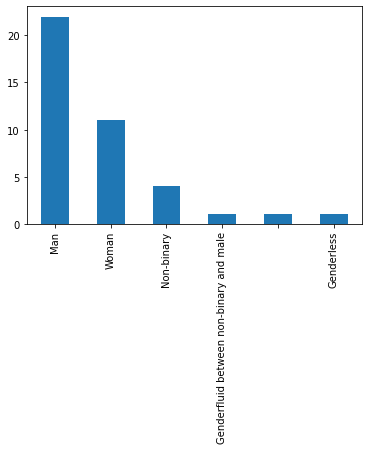

In [154]:
genderpie = rep_data.groupby(['Gender'])['Gender'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(genderpie, values='count', names='Gender', title='Participant gender')
fig.show()

rep_data['Gender'].value_counts(sort=False).plot(kind='bar', x = "gender", y = "frequency")

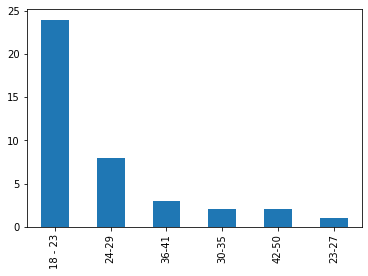

In [155]:
agepie = rep_data.groupby(['Age'])['Age'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(agepie, values='count', names='Age', title='Participant age')
fig.show()

rep_data['Age'].value_counts(sort=False).plot(kind='bar', x = "age", y = "frequency")

In [156]:
#import pandas
#from collections import Counter
#agecount = Counter(rep_data['Age'])
#df = pandas.DataFrame.from_dict(agecount, orient='index')
#df.plot(kind='bar')
#rep_data['Age'].value_counts(sort=False).plot(kind='bar', x = "age", y = "frequency")

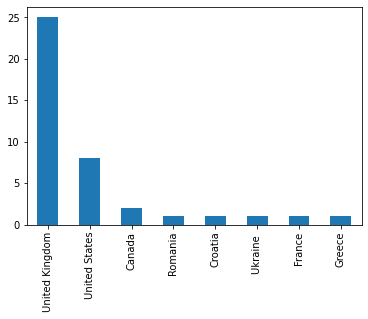

In [157]:
agepie = rep_data.groupby(['Country'])['Country'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(agepie, values='count', names='Country', title='Participant country')
fig.show()

rep_data['Country'].value_counts(sort=False).plot(kind='bar', x = "country", y = "frequency")

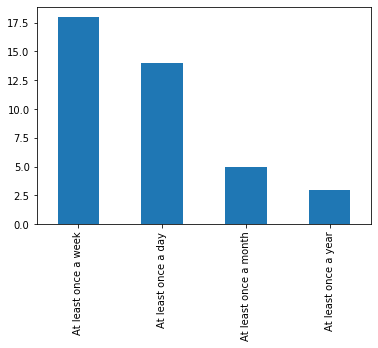

In [158]:
moviepie = rep_data.groupby(['How often movies'])['How often movies'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(moviepie, values='count', names='How often movies', title='How often participants watch movies/TV')
fig.show()

rep_data['How often movies'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

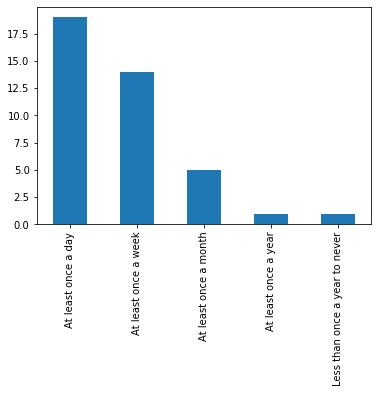

In [159]:
gamespie = rep_data.groupby(['How often games'])['How often games'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(gamespie, values='count', names='How often games', title='How often participants play video games')
fig.show()

rep_data['How often games'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

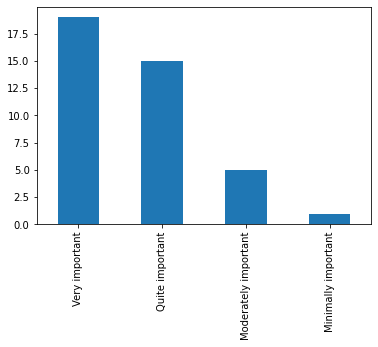

In [160]:
womenimportantpie = rep_data.groupby(['Women in media important'])['Women in media important'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Women in media important', title='Whether participants considered representation of women in media to be important')
fig.show()

rep_data['Women in media important'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

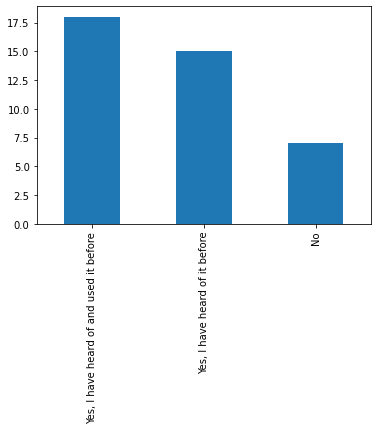

In [161]:
womenimportantpie = rep_data.groupby(['Use Bechdel before'])['Use Bechdel before'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Use Bechdel before', title='Whether participants have used the Bechdel test before')
fig.show()

rep_data['Use Bechdel before'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

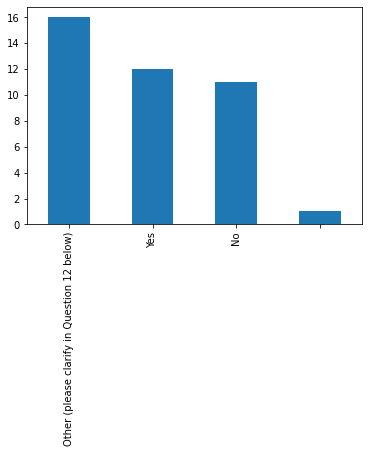

In [162]:
womenimportantpie = rep_data.groupby(['Is Bechdel good?'])['Is Bechdel good?'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Is Bechdel good?', title='Whether participants consider the Bechdel test to be effective')
fig.show()

rep_data['Is Bechdel good?'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

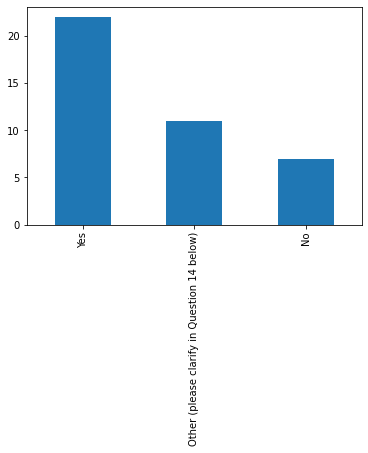

In [163]:
womenimportantpie = rep_data.groupby(['Modifications on Bechdel'])['Modifications on Bechdel'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Modifications on Bechdel', title='Whether participants consider modifications/additions to the Bechdel test would improve it')
fig.show()

rep_data['Modifications on Bechdel'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

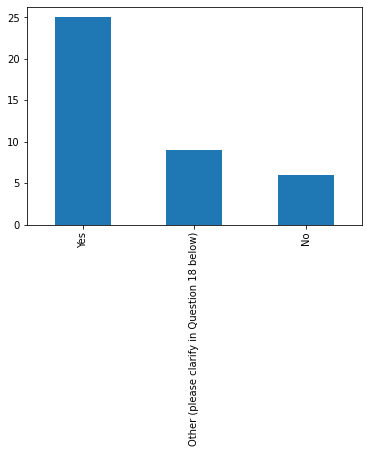

In [164]:
womenimportantpie = rep_data.groupby(['Strength'])['Strength'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Strength', title='Whether participants consider "strength" to be tied to specific character traits')
fig.show()

rep_data['Strength'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

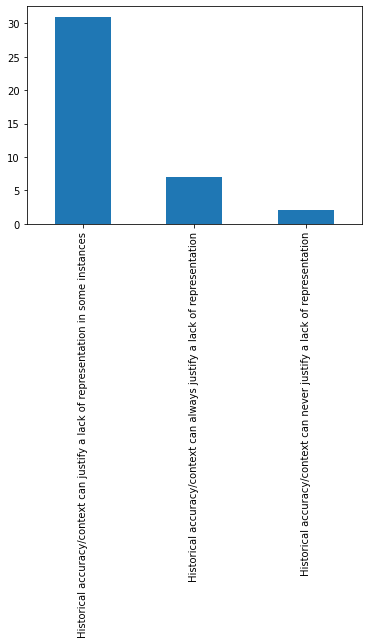

In [165]:
womenimportantpie = rep_data.groupby(['Historical context'])['Historical context'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Historical context', title='Whether participants consider historical context to justify a lack of representation')
fig.show()

rep_data['Historical context'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

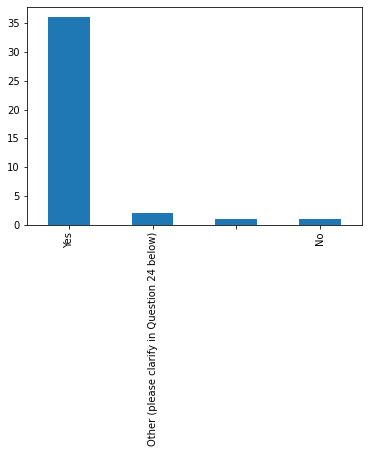

In [166]:
womenimportantpie = rep_data.groupby(['Representation changed'])['Representation changed'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Representation changed', title='Whether participants think a characters representation can be changed over time')
fig.show()

rep_data['Representation changed'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

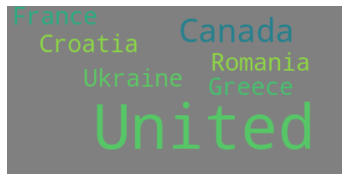

In [167]:
from wordcloud import WordCloud
#rep_data['Country'].isna().sum()
#rep_data['Country'].dropna(inplace = True)
text = " ".join(cat.split()[0] for cat in rep_data['Country'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

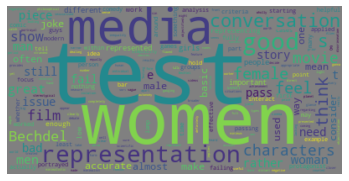

In [168]:
#from wordcloud import WordCloud
rep_data['Bechdel comments'].isna().sum()
#rep_data['Bechdel comments'].fillna(" ")
text2 = " ".join(string for string in rep_data['Bechdel comments'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text2)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

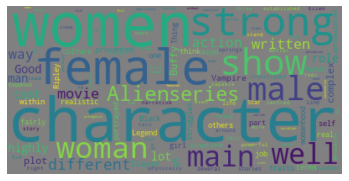

In [171]:
#from wordcloud import WordCloud
rep_data['Film good rep'].isna().sum()
#rep_data['Film good rep'].fillna(" ")
text3 = " ".join(string for string in rep_data['Film good rep'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text3)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()